In [1]:
#!pip3 install imblearn
#!pip3 install interpret

In [2]:
import pandas as pd 
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
class DataLoader():
    def __init__(self):
        self.data = None

    def load_dataset(self, path="data.csv"):
        self.data = pd.read_csv(path)

    def preprocess_data(self):
        # One-hot encode all categorical columns
        categorical_cols = ["gender",
                            "ever_married",
                            "work_type",
                            "Residence_type",
                            "smoking_status"]
        encoded = pd.get_dummies(self.data[categorical_cols], 
                                prefix=categorical_cols)

        self.data = pd.concat([encoded, self.data], axis=1)
        self.data.drop(categorical_cols, axis=1, inplace=True)

        self.data.bmi = self.data.bmi.fillna(0)
        
        self.data.drop(["id"], axis=1, inplace=True)

        
    def get_data_split(self):
        X = self.data.iloc[:,:-1]
        y = self.data.iloc[:,-1]
        return train_test_split(X, y, test_size=0.20, random_state=2021)
    
    def oversample(self, X_train, y_train):
        oversample = RandomOverSampler(sampling_strategy='minority')
        x_np = X_train.to_numpy()
        y_np = y_train.to_numpy()
        x_np, y_np = oversample.fit_resample(x_np, y_np)
        x_over = pd.DataFrame(x_np, columns=X_train.columns)
        y_over = pd.Series(y_np, name=y_train.name)
        return x_over, y_over


## Data Preprocessind and EDA

In [3]:
import matplotlib.pyplot as pyplot
data_loader=DataLoader()
data_loader.load_dataset()
data=data_loader.data

In [4]:
print(data.shape)

(5110, 12)


In [5]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Col:  id


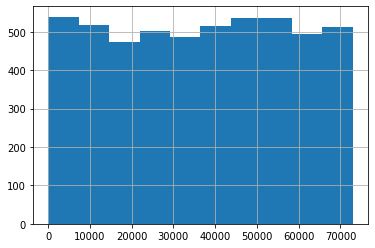

Col:  gender


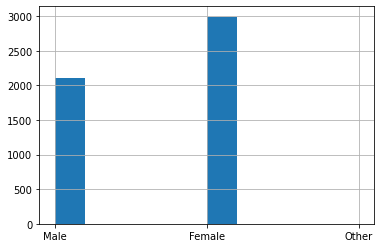

Col:  age


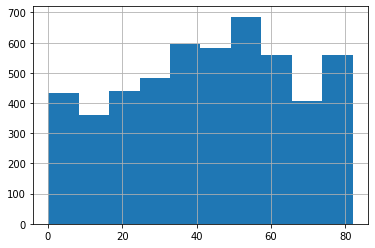

Col:  hypertension


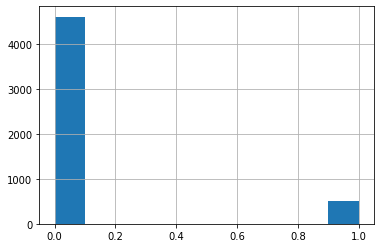

Col:  heart_disease


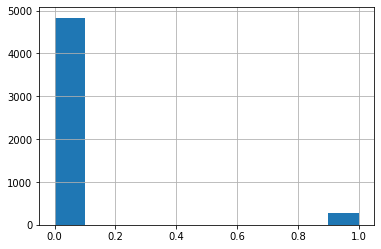

Col:  ever_married


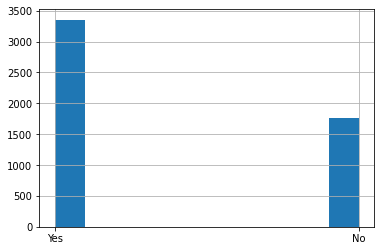

Col:  work_type


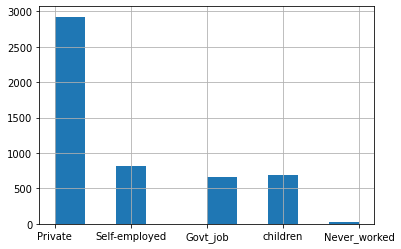

Col:  Residence_type


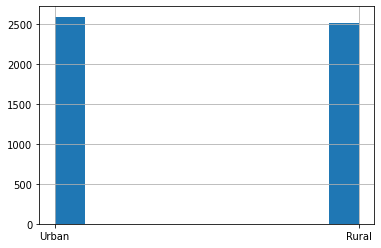

Col:  avg_glucose_level


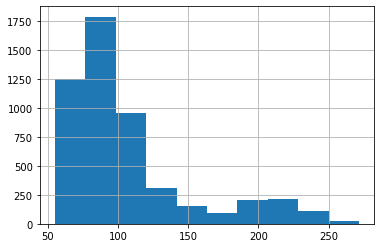

Col:  bmi


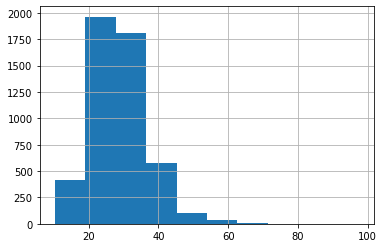

Col:  smoking_status


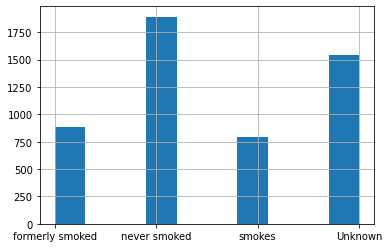

Col:  stroke


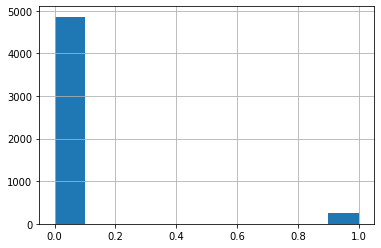

In [7]:
cols=data.columns
for col in cols:
    print("Col: ",col)
    data[col].hist()
    plt.show()

In [8]:
data_loader.preprocess_data()
data_loader.data.head()

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,67.0,0,1,228.69,36.6,1
1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,61.0,0,0,202.21,0.0,1
2,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,80.0,0,1,105.92,32.5,1
3,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,49.0,0,0,171.23,34.4,1
4,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,79.0,1,0,174.12,24.0,1


In [9]:
data_loader.data.shape

(5110, 22)

## Working on Interpreter Module

In [10]:
from interpret.glassbox import (LogisticRegression,ClassificationTree,ExplainableBoostingClassifier)
from interpret import show
from sklearn.metrics import f1_score,accuracy_score

In [11]:
X_train,X_test,y_train,y_test=data_loader.get_data_split()
print(X_train.shape)
print(X_test.shape)

(4088, 21)
(1022, 21)


In [12]:
X_train,y_train=data_loader.oversample(X_train,y_train)
X_train.shape
#Increase on training samples

(7778, 21)

In [13]:
lr=LogisticRegression(random_state=42,feature_names=X_train.columns,penalty='l1',solver='liblinear')

In [14]:
lr.fit(X_train,y_train)

In [15]:
y_pred=lr.predict(X_test)
print("F1 score {}".format(f1_score(y_test,y_pred,average='macro')))
print("Accuracy {}".format(accuracy_score(y_test,y_pred)))

F1 score 0.5145183537889878
Accuracy 0.735812133072407


In [16]:
lr_local=lr.explain_local(X_test[:100],y_test[:100],name='LR')
show(lr_local)

C:\Users\Mrudhulraj Natarajan\.conda\envs\NLP\lib\site-packages\interpret\visual\udash.py:5: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
C:\Users\Mrudhulraj Natarajan\.conda\envs\NLP\lib\site-packages\interpret\visual\udash.py:6: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\Mrudhulraj Natarajan\.conda\envs\NLP\lib\site-packages\interpret\visual\udash.py:7: UserWarning: 
The dash_table package is deprecated. Please replace
`import dash_table` with `from dash import dash_table`

Also, if you're using any of the table format helpers (e.g. Group), replace 
`from dash_table.Format import Group` with 
`from dash.dash_table.Format import Group`
  import dash_table as dt


<!-- http://127.0.0.1:7001/1255160217160/ -->

## Decision Tree

In [19]:
#Here the max_depth is set default to 3 which can also be visualised based on the show method
clt=ClassificationTree(max_depth=5)

clt.fit(X_train,y_train)

y_pred=clt.predict(X_test)
print("F1 score {}".format(f1_score(y_test,y_pred,average='macro')))
print("Accuracy {}".format(accuracy_score(y_test,y_pred)))

clt_local=clt.explain_local(X_test[:100],y_test[:100],name='Classification Tree')
show(clt_local)

F1 score 0.5433863839447436
Accuracy 0.7827788649706457


<!-- http://127.0.0.1:7001/1255195561096/ -->

## EBM 
### EBM works by training ons small boosting tree of each feature with residuals passed from one feature to other. With low learning rate it is able to achieve high accuracy and Explainability

In [20]:
ebm=ExplainableBoostingClassifier(random_state=42)

ebm.fit(X_train,y_train)

y_pred=ebm.predict(X_test)
print("F1 score {}".format(f1_score(y_test,y_pred,average='macro')))
print("Accuracy {}".format(accuracy_score(y_test,y_pred)))


F1 score 0.5853517744579648
Accuracy 0.8796477495107632


<!-- http://127.0.0.1:7001/1255160217160/ -->

In [22]:
ebm_local=ebm.explain_local(X_test[:100],y_test[:100],name='EBM')

In [23]:
show(ebm_local)

<!-- http://127.0.0.1:7001/1255193474376/ -->

### Score for individual feature

In [24]:
ebm_global=ebm.explain_global(name='EBM Global')
show(ebm_global)

<!-- http://127.0.0.1:7001/1255211601800/ -->